In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('OnlineRetailData.xls')

In [3]:
#What is the average transaction value per order and what is the associated purchase rate?

In [4]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [5]:
df['Revenue'].sum()/df['InvoiceNo'].nunique()

388.56416753201796

In [6]:
#Average transaction value per order: $388.56

In [7]:
df['Quantity'].sum()/ df ['InvoiceNo'].nunique()

189.711664935964

In [8]:
#Associated purchase rate: 189

In [9]:
#What is the relation between the money spent in each order and the number of products ordered in each order?

In [11]:
df_order_level= df.groupby (['InvoiceNo'])['Quantity','Revenue'].sum()

/var/folders/nc/q7r_qm3x29g617688jryj4jw0000gn/T/ipykernel_21957/2048080490.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_order_level= df.groupby (['InvoiceNo'])['Quantity','Revenue'].sum()


In [12]:
df_order_level=df_order_level[df_order_level['Quantity']>0]

In [13]:
df_order_level

,Quantity,Revenue
InvoiceNo,,
536365,40,139.12
536366,12,22.20
536367,83,278.73
536368,15,70.05
536369,3,17.85
...,...,...
541686,117,377.30
541690,20,42.20
541692,10,25.00


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Quantity', ylabel='Revenue'>

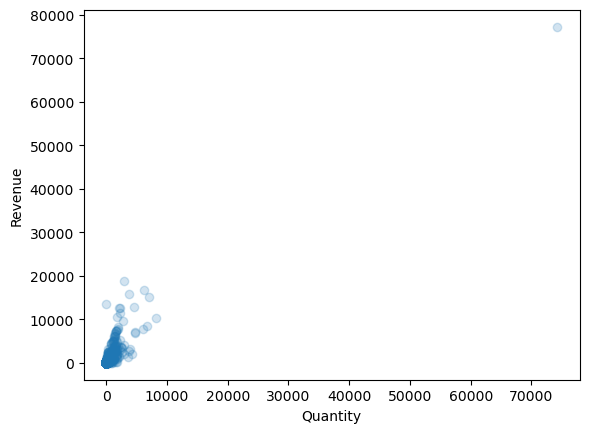

In [15]:
sns.regplot(x='Quantity', y='Revenue', data=df_order_level, fit_reg = False, scatter_kws={"alpha": 0.2})

In [16]:
#What is the average transaction value per customer? 

In [17]:
df_customer_level= df.groupby (['CustomerID'])['Quantity','Revenue'].sum()

/var/folders/nc/q7r_qm3x29g617688jryj4jw0000gn/T/ipykernel_21957/619555583.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_customer_level= df.groupby (['CustomerID'])['Quantity','Revenue'].sum()


In [18]:
df_customer_level

,Quantity,Revenue
CustomerID,,
12346.0,0,0.00
12347.0,319,711.79
12348.0,1254,892.80
12356.0,1216,2271.62
12359.0,144,547.50
...,...,...
18256.0,-70,-50.10
18259.0,116,376.30
18260.0,487,787.77


In [19]:
df_customer_level['Revenue'].mean()

729.8498006644518

In [20]:
#Average transaction value per customer: $783.01

<AxesSubplot:xlabel='Quantity', ylabel='Revenue'>

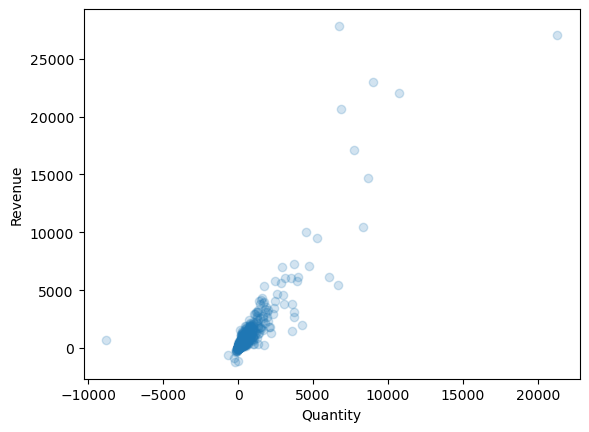

In [21]:
sns.regplot(x='Quantity', y='Revenue', data=df_customer_level, fit_reg = False, scatter_kws={"alpha": 0.2})

In [22]:
#What are the products’ sale price? 

In [23]:
df_product = pd.read_excel('OnlineRetailData.xls')

In [24]:
df_product_avg_price = df_product.groupby (['StockCode'])['UnitPrice'].mean()

In [25]:
df_product_avg_price

StockCode
10002            1.125455
10120            0.210000
10125            0.771944
10133            0.785294
10135            1.265846
                  ...    
gift_0001_20    16.845000
gift_0001_30    25.530000
gift_0001_40    34.040000
gift_0001_50    42.550000
m                2.550000
Name: UnitPrice, Length: 2973, dtype: float64

In [26]:
df_product['Revenue'] = df_product['Quantity'] * df_product['UnitPrice']

In [27]:
df_product_level= (df_product.groupby('StockCode')
    .agg({'UnitPrice':'mean', 'Revenue': 'sum'})
    .reset_index()
    .rename(columns={'Revenue':'total revenue'}))

In [28]:
df_product_level

,StockCode,UnitPrice,total revenue
0,10002,1.125455,381.35
1,10120,0.210000,3.36
2,10125,0.771944,194.19
3,10133,0.785294,173.81
4,10135,1.265846,621.90
...,...,...,...
2968,gift_0001_20,16.845000,33.69
2969,gift_0001_30,25.530000,25.53
2970,gift_0001_40,34.040000,34.04
2971,gift_0001_50,42.550000,42.55


In [29]:
#Adding year column to the dataset
df_product['Year']=df_product['InvoiceDate'].dt.to_period('Y')
df_product.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


In [30]:
#Which countries are the customers coming from? Which country has the highest consumption capacity per customer?

In [31]:
country_price = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom     455244
Netherlands         21381
EIRE                13177
France              11559
Germany             11218
Australia            5988
Japan                4048
Sweden               4006
Spain                3958
Norway               3582
Switzerland          3367
Portugal             2786
Belgium              2430
Finland              1254
Cyprus               1061
Italy                1038
Lithuania             652
Denmark               454
Poland                428
Iceland               319
Channel Islands        80
Israel                 44
Austria                 3
Bahrain                 0
Name: Quantity, dtype: int64

In [ ]:
#What is the trend of the daily or monthly sale? 

In [32]:
df_product['InvoiceDate'] = df_product['InvoiceDate'].dt.normalize()

In [35]:
df_product['InvoiceDate']

0       2010-12-01
1       2010-12-01
2       2010-12-01
3       2010-12-01
4       2010-12-01
           ...    
65530   2011-01-20
65531   2011-01-20
65532   2011-01-20
65533   2011-01-20
65534   2011-01-20
Name: InvoiceDate, Length: 65535, dtype: datetime64[ns]

<AxesSubplot:xlabel='InvoiceDate', ylabel='Quantity'>

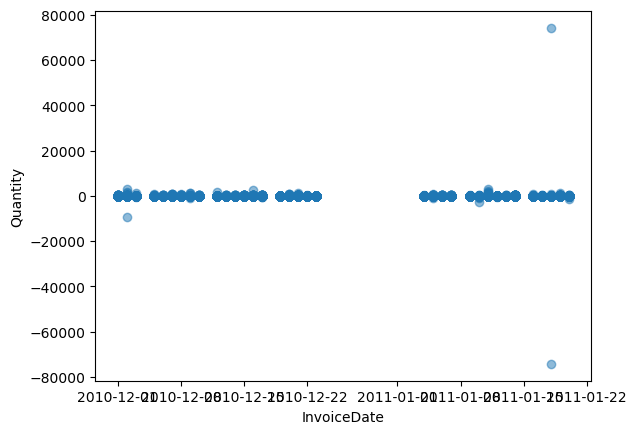

In [37]:
sns.regplot(x='InvoiceDate', y='Quantity', data=df_product, fit_reg = False, scatter_kws={"alpha": 0.5})